<a href="https://colab.research.google.com/github/avetodef/modern-data-analysis-tools-itmo/blob/main/lab1_siad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №1 - кластеризация**

импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

генерация набора данных с 100 элементами и 10 центрами, визуализация


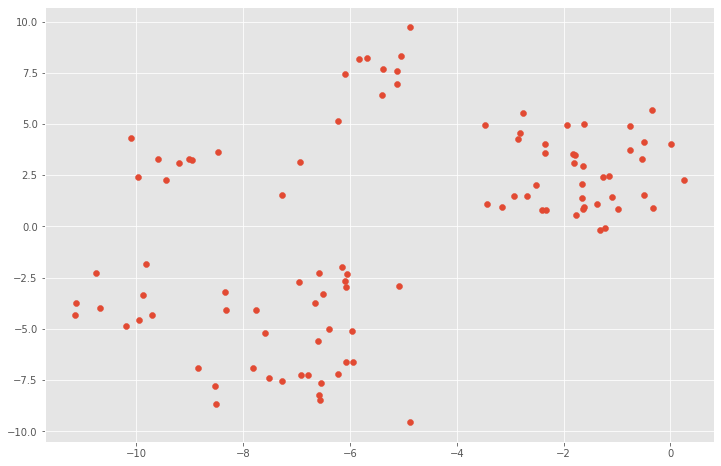

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, random_state=1, centers = 10)

plt.scatter(X[:,0], X[:,1])

**Метод локтя**

подбираем оптимальное количество кластеров, построение графика

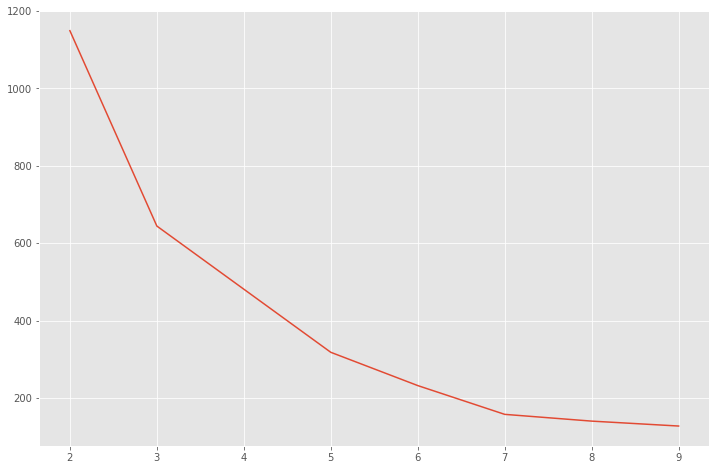

In [3]:
from sklearn.cluster import KMeans

criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)

plt.plot(range(2,10), criteries)

оптимальное количество кластеров - 7

применяем метод k-means для семи кластеров, визуализируем

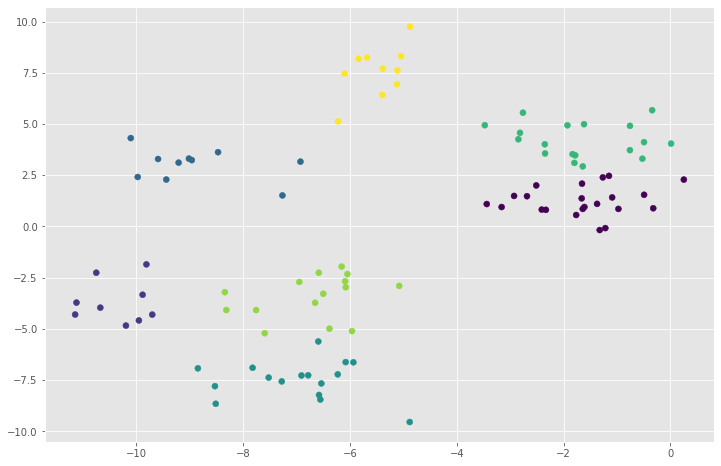

In [4]:
kmeansModel=KMeans(n_clusters=7, random_state=0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
plt.scatter(X[:,0], X[:,1], c=labels)

**Метод DBSCAN**

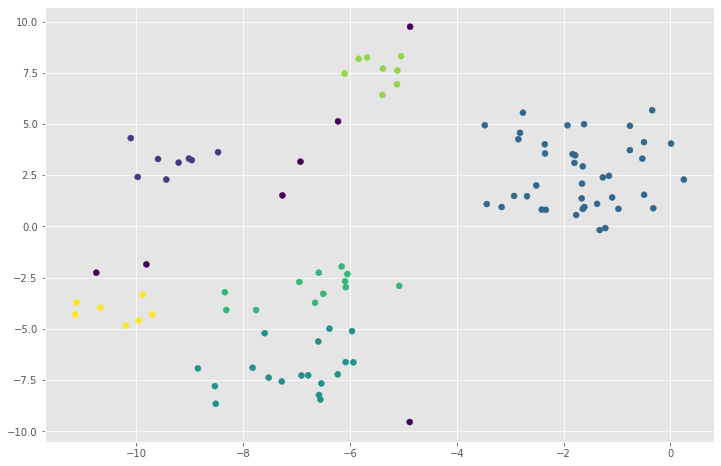

In [5]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.2, min_samples=4).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clustering);
#хууууууй)))
#python automation QA junior 

**Данные из файла Mall_customers.csv**

чтение файла

In [6]:
file = pd.read_csv("/content/drive/MyDrive/modern-instruments-for-data-analysing-itmo/Mall_Customers.csv")
file

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


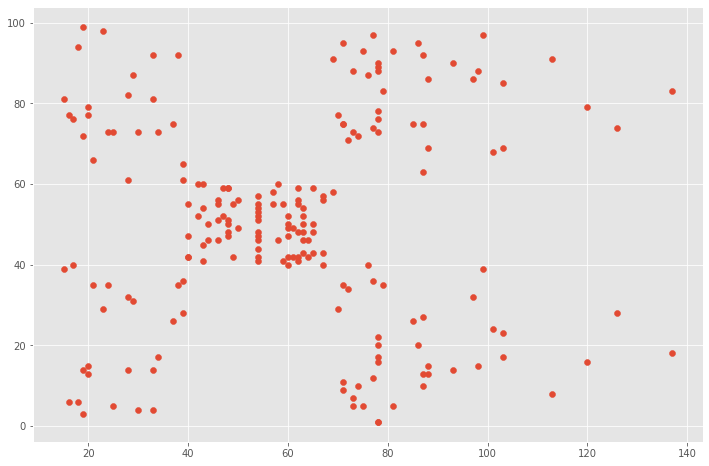

In [7]:
data = file[['Annual Income (k$)', 'Spending Score (1-100)']].values
plt.scatter(data[:,0], data[:,1])

**Метод k-means**

подбор количества кластеров методом локтя

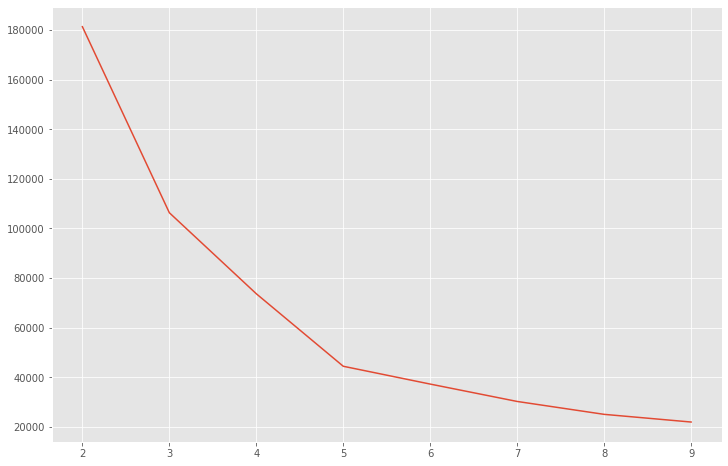

In [8]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=4)
  kmeansModel.fit(data)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

оптимальное количество кластеров - 5

обучаем модель, визуализируем

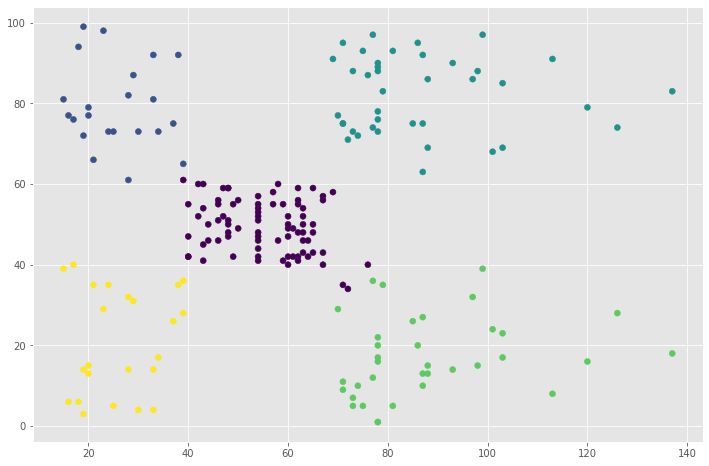

In [9]:
kmeansModel = KMeans(n_clusters = 5)
kmeansModel.fit(data)
plt.scatter(data[:,0], data[:,1], c = kmeansModel.labels_)

**DBSCAN**

[-1  0  1  0 -1  0  1 -1  1  0  1 -1  1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0  2  2  2  0  1  0  1  0 -1  0 -1  0  2  0  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4  3  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
[-1  0  1  2  3  4]
28


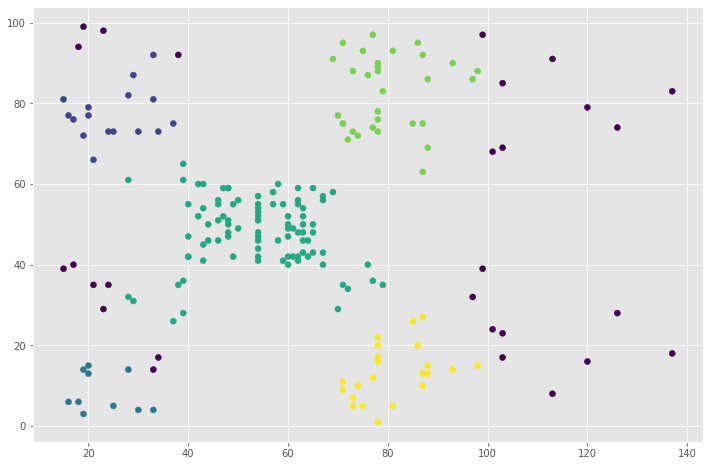

In [11]:
clustering = DBSCAN(eps = 12, min_samples = 10).fit_predict(data)

print(clustering)
print(np.unique(clustering))
print( (clustering == -1).sum())

plt.scatter(data[:,0], data[:,1], c = clustering)